# Serie VI - Dominio de Aprendizaje Supervisado por Clasificación

## E601 - Clasificación del Conjunto de datos de la planta Iris

Carga el DataFrame del Iris y construye las matrices X y el vector y (con la variedad o especie de la planta, es decir, la familia que se busca aprender).

In [1]:
import pandas as pd
import os
from os.path import dirname

cwd = dirname(os.getcwd())
iris = pd.read_csv(f"{cwd}/datasets/iris.csv")

X = iris[["sepal.length", "sepal.width", "petal.length", "petal.length"]].values
y = iris["variety"].values

X, y

(array([[5.1, 3.5, 1.4, 1.4],
        [4.9, 3. , 1.4, 1.4],
        [4.7, 3.2, 1.3, 1.3],
        [4.6, 3.1, 1.5, 1.5],
        [5. , 3.6, 1.4, 1.4],
        [5.4, 3.9, 1.7, 1.7],
        [4.6, 3.4, 1.4, 1.4],
        [5. , 3.4, 1.5, 1.5],
        [4.4, 2.9, 1.4, 1.4],
        [4.9, 3.1, 1.5, 1.5],
        [5.4, 3.7, 1.5, 1.5],
        [4.8, 3.4, 1.6, 1.6],
        [4.8, 3. , 1.4, 1.4],
        [4.3, 3. , 1.1, 1.1],
        [5.8, 4. , 1.2, 1.2],
        [5.7, 4.4, 1.5, 1.5],
        [5.4, 3.9, 1.3, 1.3],
        [5.1, 3.5, 1.4, 1.4],
        [5.7, 3.8, 1.7, 1.7],
        [5.1, 3.8, 1.5, 1.5],
        [5.4, 3.4, 1.7, 1.7],
        [5.1, 3.7, 1.5, 1.5],
        [4.6, 3.6, 1. , 1. ],
        [5.1, 3.3, 1.7, 1.7],
        [4.8, 3.4, 1.9, 1.9],
        [5. , 3. , 1.6, 1.6],
        [5. , 3.4, 1.6, 1.6],
        [5.2, 3.5, 1.5, 1.5],
        [5.2, 3.4, 1.4, 1.4],
        [4.7, 3.2, 1.6, 1.6],
        [4.8, 3.1, 1.6, 1.6],
        [5.4, 3.4, 1.5, 1.5],
        [5.2, 4.1, 1.5, 1.5],
        [5

Carga el modelo de clasificación por árboles de decisión y muestra el indicador score de aprendizaje para X y y.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X, y)

scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
scores

array([0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.8       ,
       0.86666667, 0.93333333, 1.        , 0.93333333, 0.86666667])

## E602 - Clasificación de Diabetes

Busca un Dataset que contenga registros de pacientes diabéticos y no diabéticos y entrena un clasificador para determinar si dadas las características de un paciente desarrollará o no diabetes.

Compara la tasa de aprendizaje del clasificador con otro clasificador distinto.

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print(f"Tasa de aprendizaje del clasificador SVM: {svm_accuracy:.2f}")
print(f"Tasa de aprendizaje del clasificador MLP: {mlp_accuracy:.2f}")

Tasa de aprendizaje del clasificador SVM: 0.01
Tasa de aprendizaje del clasificador MLP: 0.01


/Users/alexiscortes/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## E603 - Clasificación de dígitos

Carga el Dataset con las imágenes de dígitos escritos a mano llamado MNIST.

Sigue algún tutorial o intuye cómo convertir cada imagen en un vector de 784 valores.

Usa un modelo de clasificación para aprender a reconocer los dígitos.

Grafica un dígito del Dataset, su clase real y la que fue predicha.

In [879]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

knn = KNeighborsClassifier(n_neighbors=6,weights='distance')
knn.fit(X_train, y_train)
y_result =knn.predict(X_test)
print('Precisión del clasificador:',accuracy_score(y_test, y_result))
print(classification_report(y_test, y_result))

/Users/alexiscortes/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Precisión del clasificador: 0.9477142857142857
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1343
           1       0.96      0.99      0.97      1600
           2       0.95      0.94      0.95      1380
           3       0.94      0.95      0.94      1433
           4       0.95      0.93      0.94      1295
           5       0.95      0.94      0.94      1273
           6       0.97      0.98      0.97      1396
           7       0.94      0.93      0.93      1503
           8       0.97      0.91      0.94      1357
           9       0.89      0.93      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



7063


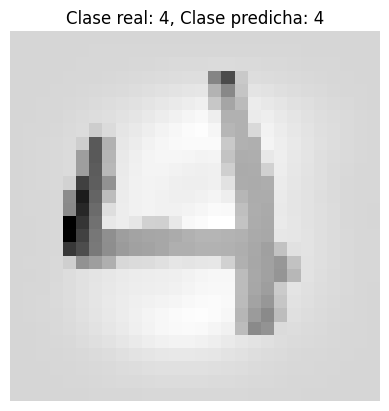

In [885]:
random_index = np.random.randint(0, len(X_test))
print(random_index)
sample_image = X_test[random_index].reshape(28, 28)
true_class = np.array(y_test).reshape(-1, 1)[random_index][0]
predicted_class = y_result[random_index]

plt.figure()
plt.imshow(sample_image, cmap='binary')
plt.title(f"Clase real: {true_class}, Clase predicha: {predicted_class}")
plt.axis('off')
plt.show()